<a href="https://colab.research.google.com/github/Aaryan-kapur/CAMSCANNER-JAISA-KUCH/blob/master/CamScanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
!sudo apt install tesseract-ocr
!pip install pytesseract
%matplotlib inline
import pytesseract
from PIL import Image

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


(972, 756, 3)
(800, 1500, 3)


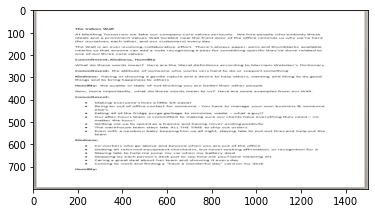

In [156]:
im_path = 'text.png'
img = cv2.imread(im_path)
print(img.shape)
img = cv2.resize(img, (1500, 800))
print(img.shape)
plt.imshow(img)
plt.show()

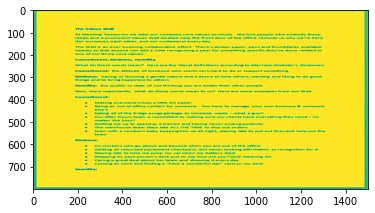

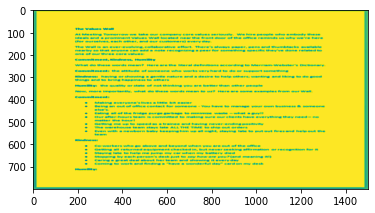

(800, 1500)


In [157]:
orig = img.copy()
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()
blurred = cv2.GaussianBlur(gray, (5,5), 0)
plt.imshow(blurred)
plt.show()
print(blurred.shape)

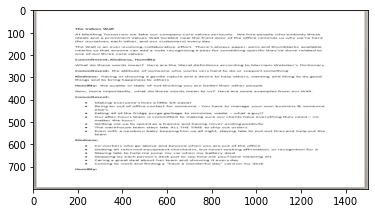

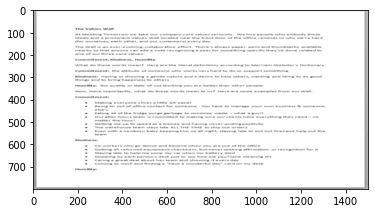

In [158]:
regen = cv2.cvtColor(blurred,cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()
plt.imshow(regen)
plt.show()

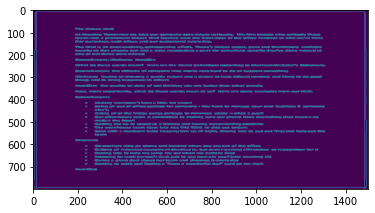

In [159]:
edged = cv2.Canny(blurred, 0, 50)
orig_edged = edged.copy()
plt.imshow(orig_edged)
plt.show()

In [160]:
contours, _ = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contours))
contours = sorted(contours, reverse=True, key=cv2.contourArea)

3903


In [161]:
for c in contours:
    p = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02*p, True)
    
    if len(approx) == 4:
        target = approx
        break

print(target.shape)

(4, 1, 2)


In [162]:
def reorder(h):
    h = h.reshape((4,2))
    print(h)
    
    hnew = np.zeros((4,2), dtype=np.float32)
    
    add = h.sum(axis=1)
    hnew[3] = h[np.argmin(add)]
    hnew[1] = h[np.argmax(add)]
    
    diff = np.diff(h, axis=1)
    hnew[0] = h[np.argmin(diff)]
    hnew[2] = h[np.argmax(diff)]
    return hnew

In [163]:
reorderd = reorder(target)
print('----------')
print(reorderd)

[[  16    5]
 [  16  792]
 [1483  792]
 [1483    5]]
----------
[[1483.    5.]
 [1483.  792.]
 [  16.  792.]
 [  16.    5.]]


In [164]:
input_represent = reorderd
output_map = np.float32([[0,0],[800,0],[800,800],[0,800]])

In [165]:
M = cv2.getPerspectiveTransform(input_represent, output_map)
ans = cv2.warpPerspective(orig, M, (800,800))

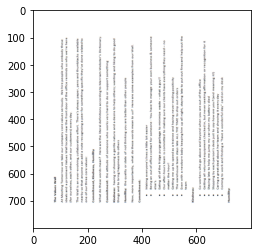

The Values Wall

[At Meeting Tomorrow we take our company core values seriously. We hire people who embody these
ideals and a prominent Values Wall located near the front door of the office reminds us why we're here
(for ourselves, each other, and our customers) every day.

‘The Wall is an ever-evolving, collaborative effort. There's always paper, pens and thumbtacks available
nearby so that anyone can add a note recognizing a peer for something specific they've done related to
‘one of our three core values:

‘Commitment, Kindness, Humility
‘What do these words mean? Here are the literal definitions according to Merriam-Webster’s Dictionary.
‘Commitment: the attitude of someone who works very hard to do or support something

Kindness: having or showing a gentle nature and a desire to help others; wanting and liking to do good
things and to bring happiness to others

Humility: the quality or state of not thinking you are better than other people
Now, more importantly, what do these word

In [170]:
plt.imshow(ans)

plt.show()
img_cv = cv2.imread(r'text.png')
img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
print(pytesseract.image_to_string(img_rgb))